# `pyCactus` Demo
This notebook demonstrates the core functionality of the `pyCactus` post-processing module.

Author: [Phillip Chiu](mailto:pchiu@sandia.gov)

In [1]:
# enable autoreload
%load_ext autoreload
%autoreload 2

# set up plotting backend
# %matplotlib nbagg
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

# matplotlib.rcParams['figure.figsize'] = (14.0, 10.5)  # large figures
matplotlib.rcParams['figure.figsize'] = (8, 6)         # medium figures
matplotlib.rcParams.update({'font.size': 14})          # label size

# set up paths
import os
import sys

nb_root_dir = os.path.expanduser('~/Notebooks/')      # notebook root dir
nb_dir_name = 'demo1'                                 # notebook work dir name
nb_dir = os.path.abspath(os.path.join(nb_root_dir,
                                      nb_dir_name))   # notebook work dir

# create notebook dir if it doesn't exist
if not os.path.exists(nb_dir):
    os.makedirs(nb_dir)
    
sys.path.append(nb_dir) # append notebook work dir to pythonpath
os.chdir(nb_dir)        # change path to notebook work dir

# import commonly-used modules
import math
import numpy as np
import pandas as pd
import time as pytime

# apply style (from external notebook)
%run '~/Notebooks/style.ipynb'
clean()

Add the path to pyCactus and import.

In [2]:
sys.path.append(nb_dir + '/CACTUS-tools/')
import pyCactus

## Creating a `CactusRun` instance
The `CactusRun` reads and stores information about a single run. The path to the data files is specified when initializing the `CactusRun` instance. It can be instantiated as follows:

In [3]:
case_name  = 'NREL-5MW'
run_dir    = os.path.join(nb_dir,'NREL-5MW-CACTUS')

In [4]:
tic = pytime.time()
geom_fname = 'NREL-5MW.geom'
run = pyCactus.CactusRun(run_dir, case_name,
                         geom_fname=geom_fname,
                         wakeelem_fnames_pattern='*WakeData_*.csv',
                         field_fnames_pattern='*WakeDefData_*.csv')
print 'Time to instantiante CactusRun class: %2.2f s' % (pytime.time() - tic)

Read input namelist in 0.01 s
Read geometry file in 0.01 s
Read parameter data in 0.00 s
Read revolution-averaged data in 0.00 s
Read blade element data in 0.06 s
Read time data in 0.01 s
Read 20 wake element data headers in 0.00 s
Read 20 wake element data headers in 0.00 s
Read grid dimensions in 0.05 s
Read 6 probe data file headers in 0.00 s

Success: Loaded case `NREL-5MW` from path `/home/phil/Notebooks/demo1/NREL-5MW-CACTUS`

Time to instantiante CactusRun class: 0.17 s


On instantiation, the `CactusRun` class loads the geometry file along with the time data, blade element data, and revolution-averaged data. It also parses the first line of each of the wake grid and wake node `.csv` files to determine the output times.

The time, element, and revolution data are stored as Pandas dataframes. In order to reduce both memory usage and the time for class instantiation, data is only read from wake element and field data files (which may be very large) when needed.

## Geometry data
The geometry data can be accessed easily by calling the `CactusRun.geom` attribute, which is an instance of the `CactusGeom` class.

The geometry data is stored in the `globalvars`, `blades`, and `struts` attributes.

In [5]:
run.geom.globalvars

{'NBlade': [3],
 'NStrut': [0],
 'RefAR': array([ 3.14159]),
 'RefR': array([ 206.693]),
 'RotN': array([ 1.,  0.,  0.]),
 'RotP': array([ 0.,  0.,  0.]),
 'Type': ' HAWT'}

The `blades` and `struts` are lists of variable dictionaries, enumerated by blade number and strut number.

In [6]:
blade_num = 0
run.geom.blades[blade_num].keys()

['ECtoR',
 'nEz',
 'nEx',
 'nEy',
 'tz',
 'PEy',
 'PEz',
 'ty',
 'QCz',
 'QCy',
 'QCx',
 'iSect',
 'EAreaR',
 'NElem',
 'dr_over_R',
 'r_over_R_elem',
 'FlipN',
 'PEx',
 'CtoR',
 'tx',
 'Blade 1',
 'sEz',
 'sEy',
 'sEx',
 'tEx',
 'tEy',
 'tEz']

## Accessing time, revolution-averaged, and blade element data
Time, blade element, and revolution data can be accessed using the appropriate variables names:

- `CactusRun.time_data`
- `CactusRun.elem_data`
- `CactusRun.rev_data`

Each returns a Pandas dataframe whose column names are shown below.

### Time data

The column names for the time data are shown below.

In [7]:
run.time_data.columns

Index([u'Normalized Time (-)', u'Theta (rad)', u'Rev', u'Torque Coeff. (-)',
       u'Power Coeff. (-)', u'Fx Coeff. (-)', u'Fy Coeff. (-)',
       u'Fz Coeff. (-)', u'Blade Fx Coeff. (-)', u'Blade Fy Coeff. (-)',
       u'Blade Fz Coeff. (-)', u'Blade Torque Coeff. (-)',
       u'Blade Fx Coeff. (-).1', u'Blade Fy Coeff. (-).1',
       u'Blade Fz Coeff. (-).1', u'Blade Torque Coeff. (-).1',
       u'Blade Fx Coeff. (-).2', u'Blade Fy Coeff. (-).2',
       u'Blade Fz Coeff. (-).2', u'Blade Torque Coeff. (-).2'],
      dtype='object')

It is easy to plot this data. Here we use the built-in plotting feature of the Pandas dataframe, but this could also be done with NumPy.

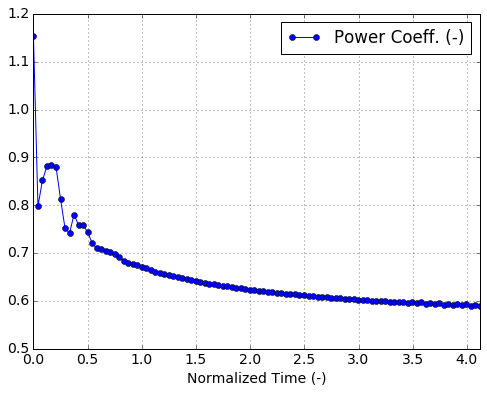

In [8]:
plt.figure()
run.time_data.plot(x='Normalized Time (-)',y='Power Coeff. (-)',
                   marker='o')
plt.grid(True)

### Revolution-averaged data

The column names for the revolution-averaged data are shown below.

In [9]:
run.rev_data.columns

Index([u'Rev', u'Power Coeff. (-)', u'Tip Power Coeff. (-)',
       u'Torque Coeff. (-)', u'Fx Coeff. (-)', u'Fy Coeff. (-)',
       u'Fz Coeff. (-)', u'Power (kW)', u'Torque (ft-lbs)'],
      dtype='object')

As with the time data, this can be easily plotted.

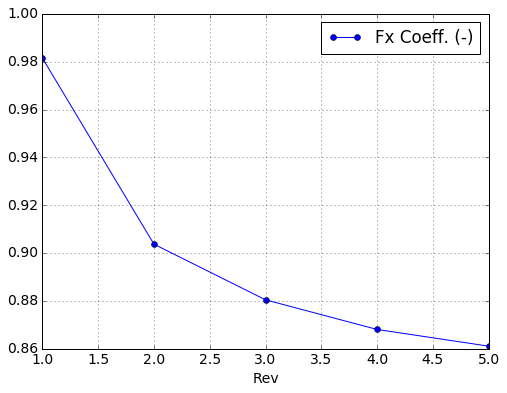

In [10]:
plt.figure()
run.rev_data.plot(x='Rev',y='Fx Coeff. (-)',
                   marker='o')
plt.grid(True)

### Blade element data

The column names for the blade element data are shown below.

In [11]:
run.bladeelem_data.data.columns

Index([u'Normalized Time (-)', u'Theta (rad)', u'Blade', u'Element', u'Rev',
       u'x/R (-)', u'y/R (-)', u'z/R (-)', u'AOA25 (deg)', u'AOA50 (deg)',
       u'AOA75 (deg)', u'AdotNorm (-)', u'Re (-)', u'Mach (-)', u'Ur (-)',
       u'IndU (-)', u'IndV (-)', u'IndW (-)', u'GB (?)', u'CL (-)', u'CD (-)',
       u'CM25 (-)', u'CLCirc (-)', u'CN (-)', u'CT (-)', u'Fx (-)', u'Fy (-)',
       u'Fz (-)', u'te (-)'],
      dtype='object')

This data can also be plotted easily. We can extract the blade data at a particular time index by calling `CactusRun.blade_data_at_time_index()`.

For horizontal axis wind turbines, it is often desirable to plot a blade quantity against the distance from the rotation axis. This is demonstrated here using data from the `CactusRun.geom` instance.

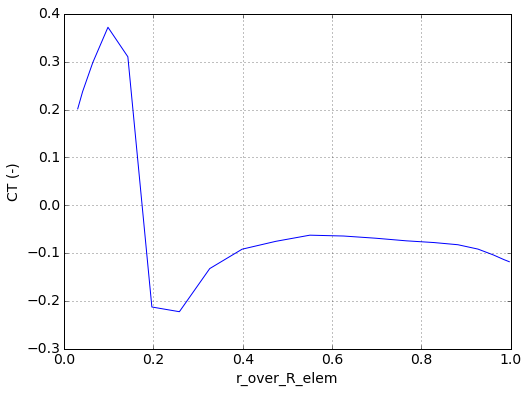

In [12]:
blade_num = 0

# get the blade data at the final time index
time, dfs_blade = run.bladeelem_data.data_at_time_index(time_index=-1)

plt.figure()
plt.plot(run.geom.blades[blade_num]['r_over_R_elem'],
         dfs_blade[blade_num]['CT (-)'])
plt.grid(True)
plt.xlabel('r_over_R_elem')
plt.ylabel('CT (-)')
plt.show()

The blade data can also be time-averaged over specified timesteps. In the following example, we average over the last 5 timesteps.

In [13]:
timesteps = range(-5,0)
CT_averaged = run.bladeelem_data.data_time_average('CT (-)', timesteps, 1)

timesteps

[-5, -4, -3, -2, -1]

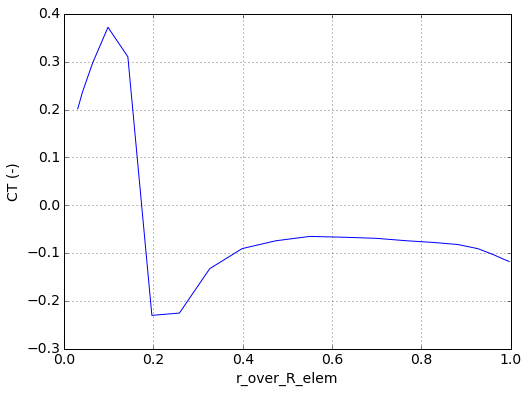

In [14]:
plt.figure()
plt.plot(run.geom.blades[blade_num]['r_over_R_elem'],
         CT_averaged)
plt.grid(True)
plt.xlabel('r_over_R_elem')
plt.ylabel('CT (-)')
plt.show()

## Accessing wake element and field data
Due to their potentially large file sizes, wake element and field data are accessed differently than the above data -- the entire data file is never loaded into memory.

### Wake element data

#### Viewing times

The times at which we have wake element data can be easily viewed.

In [15]:
run.wakeelems.num_times

20

In [16]:
run.wakeelems.times

array([ 0.       ,  0.2080525,  0.416105 ,  0.6241575,  0.83221  ,
        1.040262 ,  1.248315 ,  1.456367 ,  1.66442  ,  1.872472 ,
        2.080525 ,  2.288577 ,  2.49663  ,  2.704682 ,  2.912735 ,
        3.120787 ,  3.32884  ,  3.536892 ,  3.744945 ,  3.952997 ])

#### Extracting data to NumPy arrays
A dataframe containing data at a particular timestep can be extracted using the method `CactusWakeElem.get_df_inst()`. This returns a dictionary containing variables names and their values as NumPy arrays.

In [17]:
# Get dataframe for a specific time
ti = 5
wake_df_inst = run.wakeelems.get_df_inst(time=run.wakeelems.times[ti])
wake_df_inst.head()

# extract variables
wakeelemdata, has_node_ids = run.wakeelems.wakedata_from_df(wake_df_inst)

In [18]:
wakeelemdata.keys()

['node_ids', 'elems', 'u', 'w', 'v', 'y', 'x', 'z']

The second return is a flag which indicates whether the wake element data files have a `node_id` column. (For compatibility with data generated by versions of CACTUS).

In [19]:
has_node_ids

True

#### Writing to VTK

The wake element data can be written to a VTK file to facilitate post-processing with ParaView or other tools. To do this, we can use the `CactusWakeElems.write_vtk_series()` method. This writes a series of VTK files, and a `.pvd` collection file which can be read into ParaView directly as a time series.

In [20]:
wakeelem_output_path = os.path.join(nb_dir,'vtk')
run.wakeelems.write_vtk_series(wakeelem_output_path,
                               'wakenode_name',
                               print_status=False)

(['/home/phil/Notebooks/demo1/vtk/wakenode_name_0.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_1.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_2.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_3.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_4.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_5.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_6.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_7.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_8.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_9.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_10.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_11.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_12.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_13.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_14.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_15.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenode_name_16.vtu',
  '/home/phil/Notebooks/demo1/vtk/wakenod

### Field data

#### Viewing times

In [21]:
run.wakeelems.num_times

20

In [22]:
run.field.times

array([ 0.       ,  0.2080525,  0.416105 ,  0.6241575,  0.83221  ,
        1.040262 ,  1.248315 ,  1.456367 ,  1.66442  ,  1.872472 ,
        2.080525 ,  2.288577 ,  2.49663  ,  2.704682 ,  2.912735 ,
        3.120787 ,  3.32884  ,  3.536892 ,  3.744945 ,  3.952997 ])

#### Extracting data to NumPy arrays
A dataframe containing data at a particular timestep can be extracted using the method `CactusField.get_df_inst()`. This returns a dictionary containing variables names and their values as NumPy arrays.

In [23]:
# Get dataframe for a specific time
ti = 5
field_df_inst = run.field.get_df_inst(time=run.wakeelems.times[ti])
field_df_inst.head()

# extract variables
fielddata, fielddims = run.field.fielddata_from_df(field_df_inst)

In [24]:
fielddata.keys()

['Ufs', 'Wfs', 'U', 'W', 'V', 'Y', 'X', 'Z', 'Vfs']

The second return is a dictionary of the field dimensions.

In [25]:
fielddims

{'dx': 0.0,
 'dy': 0.040000000000000001,
 'dz': 0.040000000000000001,
 'nx': 1,
 'ny': 100,
 'nz': 100,
 'xlim': [0.0, 0.0],
 'ylim': [-2.0, 2.0],
 'zlim': [-2.0, 2.0]}

The dimensions of the returned arrays match the grid dimensions.

In [26]:
fielddata['U'].shape

(100, 100, 1)

#### Time series at a specific location on the Cartesian grid
Data at a specific location can be extracted. This operation may take some time, since it loops through all the data files.

In [27]:
# enter a list of point coordinates
point_list = [(0.0, 0.5, 0.5),
              (1.0, 0.0, 0.0)]

tic = pytime.time()
timeseries_dict, nearest_points = run.field.pointdata_time_series(point_list, ti_start=0, ti_end=-1)
print 'Time to produce series: %2.2f s' % (pytime.time() - tic)

print nearest_points

Time to produce series: 0.70 s
[(0.0, 0.50505048, 0.50505048), (0.0, -0.02020202, -0.02020202)]


In [28]:
# extract the data
t   = timeseries_dict['t']
u   = timeseries_dict['u']
v   = timeseries_dict['v']
w   = timeseries_dict['w']
ufs = timeseries_dict['ufs']
vfs = timeseries_dict['vfs']
wfs = timeseries_dict['wfs']

[ 0.         0.2080525  0.416105   0.6241575  0.83221    1.040262   1.248315
  1.456367   1.66442    1.872472   2.080525   2.288577   2.49663    2.704682
  2.912735   3.120787   3.32884    3.536892   3.744945 ]


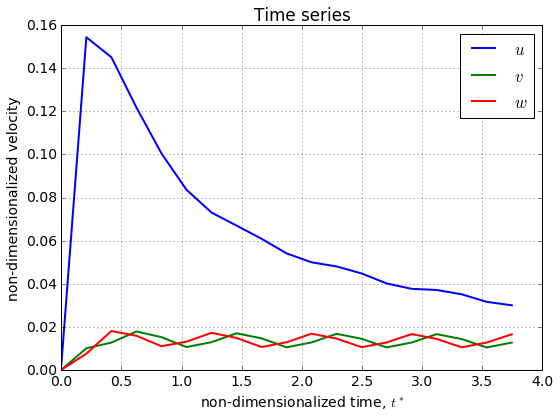

In [29]:
point_id = 1

print t
# plot the data at the point_id'th point
plt.figure()
plt.plot(t, u[point_id,:], label='$u$', lw=2)
plt.plot(t, v[point_id,:], label='$v$', lw=2)
plt.plot(t, w[point_id,:], label='$w$', lw=2)

plt.title('Time series')
plt.xlabel('non-dimensionalized time, $t^*$')
plt.ylabel('non-dimensionalized velocity')
plt.legend(loc='best')

plt.grid(True)
plt.tight_layout()
plt.show()

#### Field averaging
We can time average the field data using the `CactusField.field_time_average()` method. This returns a dictionary containing the averaged data.

In [30]:
tic = pytime.time()

averaged_data = run.field.field_time_average(ti_start=-5,
                                             ti_end=-1)

print 'Time to average fields: %2.2f s' % (pytime.time() - tic)

Time to average fields: 0.19 s


In [31]:
print averaged_data.keys()

['Ufs', 'U', 't', 'W', 'V', 'Y', 'X', 'Z', 'Vfs', 'Wfs']


The `t` field gives the normalized times which were averaged.

In [32]:
print averaged_data['t']

[ 3.120787  3.32884   3.536892  3.744945]


The averaged data may be plotted.

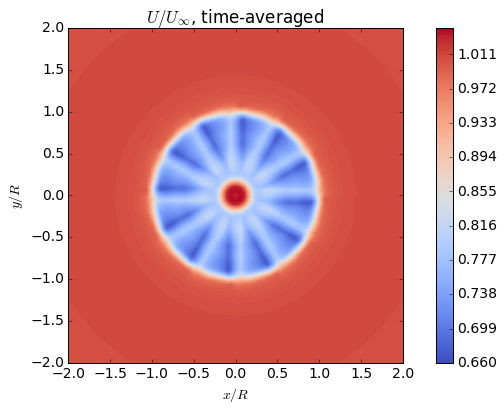

In [33]:
import matplotlib.cm as cm

# Get the data
X   = averaged_data['X']
Y   = averaged_data['Y']
Z   = averaged_data['Z']
U   = averaged_data['U']
V   = averaged_data['V']
W   = averaged_data['W']
Ufs = averaged_data['Ufs']
Vfs = averaged_data['Vfs']
Wfs = averaged_data['Wfs']

# Reshape to 2D
ny = run.field.grid_dims['ny']
nz = run.field.grid_dims['nz']

X   = np.reshape(X, [ny, nz])
Y   = np.reshape(Y, [ny, nz])
Z   = np.reshape(Z, [ny, nz])
U   = np.reshape(U, [ny, nz])
V   = np.reshape(V, [ny, nz])
W   = np.reshape(W, [ny, nz])
Ufs = np.reshape(Ufs, [ny, nz])
Vfs = np.reshape(Vfs, [ny, nz])
Wfs = np.reshape(Wfs, [ny, nz])

# u
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.contourf(Y,Z,U+Ufs,128,cmap=cm.coolwarm)
fig.colorbar(cax)
ax.axis('image')
ax.set_title('$U/U_{\infty}$, time-averaged')
ax.set_xlabel('$x/R$')
ax.set_ylabel('$y/R$')

plt.show()

#### Writing to VTK file
As with the wake element data, the field data can also be written to VTK files, using the `CactusField.write_vtk_series()` method. This writes a series of structured VTK files (`.vts`), and a `.pvd` collection file which can be read into ParaView directly as a time series.

In [34]:
field_output_path    = os.path.join(nb_dir,'vtk')
run.field.write_vtk_series(field_output_path,
                           'field',
                           print_status=False)

(['/home/phil/Notebooks/demo1/vtk/field_0.vts',
  '/home/phil/Notebooks/demo1/vtk/field_1.vts',
  '/home/phil/Notebooks/demo1/vtk/field_2.vts',
  '/home/phil/Notebooks/demo1/vtk/field_3.vts',
  '/home/phil/Notebooks/demo1/vtk/field_4.vts',
  '/home/phil/Notebooks/demo1/vtk/field_5.vts',
  '/home/phil/Notebooks/demo1/vtk/field_6.vts',
  '/home/phil/Notebooks/demo1/vtk/field_7.vts',
  '/home/phil/Notebooks/demo1/vtk/field_8.vts',
  '/home/phil/Notebooks/demo1/vtk/field_9.vts',
  '/home/phil/Notebooks/demo1/vtk/field_10.vts',
  '/home/phil/Notebooks/demo1/vtk/field_11.vts',
  '/home/phil/Notebooks/demo1/vtk/field_12.vts',
  '/home/phil/Notebooks/demo1/vtk/field_13.vts',
  '/home/phil/Notebooks/demo1/vtk/field_14.vts',
  '/home/phil/Notebooks/demo1/vtk/field_15.vts',
  '/home/phil/Notebooks/demo1/vtk/field_16.vts',
  '/home/phil/Notebooks/demo1/vtk/field_17.vts',
  '/home/phil/Notebooks/demo1/vtk/field_18.vts',
  '/home/phil/Notebooks/demo1/vtk/field_19.vts'],
 '/home/phil/Notebooks/demo1/

## Probe data

The `CactusRun.probe` attribute is an instance of the `CactusProbe` class. We can check the number of probes and their locations.

In [35]:
run.probes.num_probes

6

In [36]:
run.probes.locations

{0: (0.0, 0.0, 0.0),
 1: (1.0, 0.0, 0.0),
 2: (2.0, 0.0, 0.0),
 3: (3.0, 0.0, 0.0),
 4: (4.0, 0.0, 0.0),
 5: (5.0, 0.0, 0.0)}

We can also extract the probe data using `get_probe_data_by_id()`.

In [37]:
run.probes.get_probe_data_by_id(1).head()

Normalized Time (-)  U/Uinf (-)    V/Uinf (-)    W/Uinf (-)  Ufs/Uinf (-)  \
0             0.000000    0.000288  3.685064e-09 -2.268072e-09             1   
1             0.041611   -0.004127 -1.330602e-09  1.217035e-09             1   
2             0.083221   -0.007950  1.282547e-09  5.536929e-10             1   
3             0.124832   -0.012012  4.207945e-10  3.674458e-10             1   
4             0.166442   -0.016445  6.160830e-10  5.428379e-10             1   

   Vfs/Uinf (-)  Wfs/Uinf (-)  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0

The velocity for any given probe can be plotted quickly by calling `plot_probe_data_by_id()`.

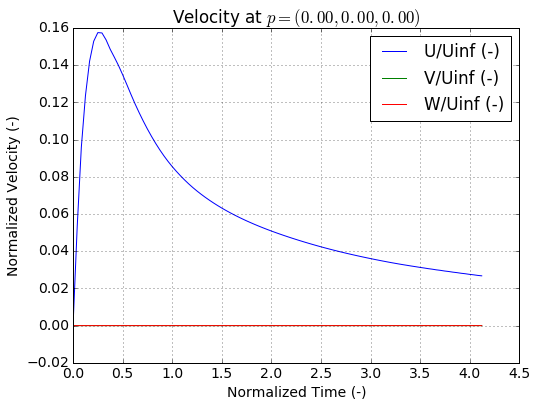

In [38]:
fig, ax = run.probes.plot_probe_data_by_id(0,timestep=False)

## Accessing the input namelist

The input file namelist can be accessed using the `namelist` instance attribute.

In [39]:
run.input.namelist

OrderedDict([('configinputs',
              OrderedDict([('gpflag', 0),
                           ('nr', 5),
                           ('nti', 20),
                           ('iut', 1),
                           ('convrg', -1),
                           ('ifc', 0),
                           ('nric', 9),
                           ('ntif', 30),
                           ('iutf', 1),
                           ('convrgf', 0.0001),
                           ('ixterm', 0),
                           ('xstop', 5)])),
             ('caseinputs',
              OrderedDict([('jbtitle', 'NREL 5 MW'),
                           ('rho', 0.002378),
                           ('vis', 3.739e-07),
                           ('tempr', 60.0),
                           ('slex', 0.0),
                           ('hblref', 0.0),
                           ('hag', 295.276),
                           ('rpm', 12.1),
                           ('ut', 7.55),
                           ('geomfilepath'

This namelist can easily be modified and rewritten as a separate file (perhaps facilitating parametric studies of parameters).

In [40]:
run.input.namelist['configinputs']['nti'] = 30

In [41]:
import StringIO

output = StringIO.StringIO()
run.input.namelist.write(output)

In [42]:
print output.getvalue()

&configinputs
    gpflag = 0
    nr = 5
    nti = 30
    iut = 1
    convrg = -1
    ifc = 0
    nric = 9
    ntif = 30
    iutf = 1
    convrgf = 0.0001
    ixterm = 0
    xstop = 5
/

&caseinputs
    jbtitle = 'NREL 5 MW'
    rho = 0.002378
    vis = 3.739e-07
    tempr = 60.0
    slex = 0.0
    hblref = 0.0
    hag = 295.276
    rpm = 12.1
    ut = 7.55
    geomfilepath = './NREL-5MW.geom'
    nsect = 8
    afdpath = './airfoils/Cylinder1.dat', './airfoils/Cylinder2.dat', './airfoils/DU40_A17.dat',
              './airfoils/DU35_A17.dat', './airfoils/DU30_A17.dat', './airfoils/DU25_A17.dat',
              './airfoils/DU21_A17.dat', './airfoils/NACA64_A17.dat'
/

&configoutputs
    diagoutflag = 1
    output_elflag = 1
    wakeelementoutflag = 1
    wakegridoutflag = 1
    probeflag = 1
    probespecpath = './probes.dat'
/

